In [35]:
import utils.constants as const
import utils.pathbuilder as upb
import os
import random
from PIL import Image
import numpy as np
from skimage import transform
from matplotlib.pyplot import imshow
%matplotlib inline

In [36]:
filename = './images/01.png'

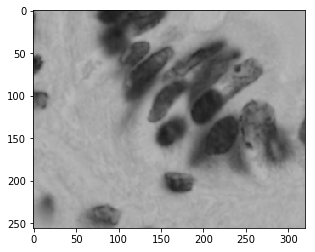

In [37]:
mask = Image.open(filename)
mask = mask.convert('LA').convert('RGB')
arr = np.asarray(mask)
imshow(arr)
mask.close()

In [38]:
processed = arr/255
processed.shape

(256, 320, 3)

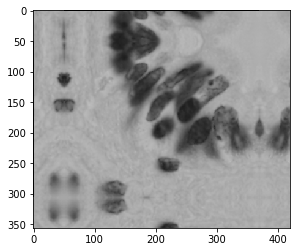

In [45]:
def apply_padding(image_array, padding = 50):
    if len(image_array.shape) == 2:
        w, h = image_array.shape
        padded_array = np.zeros((w + padding * 2, h + padding * 2))
    else:
        w, h, c = image_array.shape
        padded_array = np.zeros((w + padding * 2, h + padding * 2, c))
        
    # Copy all content
    for i in range(w):
        for j in range (h):
            padded_array[i + padding][j + padding] = image_array[i][j]
            
    # For left and right
    for i in range(w):
        for j in range(padding):
            # Left
            padded_array[padding + i][padding - j] = image_array[i][j + 1]
            # Right
            padded_array[padding + i][h + padding + j] = image_array[i][h - j - 1]
            
    # For up and down
    for i in range(h):
        for j in range(padding):
            # Up
            padded_array[padding - j][padding + i] = image_array[j + 1][i]
            # Down
            padded_array[w + padding + j][padding + i] = image_array[w - j - 1][i]
            
    # For diagonal
    for i in range(padding):
        for j in range(padding):
            # Up Left
            padded_array[i][j] = image_array[padding - i][padding - j]
            # Up Right
            padded_array[i][h + padding + j] = image_array[padding - i][h - j - 1]
            # Downn Left
            padded_array[w + padding + i][j] = image_array[w - i - 1][padding - j]
            # Down Right
            padded_array[w + padding + i][h + padding + j] = image_array[w - i - 1][h - j - 1]
    
    return np.uint8(padded_array * 255)

padded = apply_padding(processed)
imshow(padded)